# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import nltk
import re



In [2]:
# Download NLTK resources for stopword removal
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chinelo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chinelo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Your Dataset

In [3]:
import pandas as pd

file_path = r"C:\Users\Chinelo\Downloads\twitterdata.csv"

try:
    twitter_data = pd.read_csv(file_path, encoding='latin1')  
    print("Data imported successfully!")
    print(twitter_data.head())
except Exception as e:
    print(f"An error occurred: {e}")


Data imported successfully!
   ItemID  Sentiment                                      SentimentText
0       1          0                       is so sad for my APL frie...
1       2          0                     I missed the New Moon trail...
2       3          1                            omg its already 7:30 :O
3       4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4       5          0           i think mi bf is cheating on me!!!   ...


# Clean and Preprocess Text Data

In [4]:
# printing the stopwords in english
# stopwords are anything that doesnt have any influencial meaning to my text data
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
twitter_data.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources

nltk.download('wordnet')  # Required for lemmatization

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatized_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a cleaned string
    return ' '.join(tokens)

# Apply lemmatization to the 'text' column and create a new 'lemmatized_text' column
twitter_data['lemmatized_text'] = twitter_data['SentimentText'].apply(lemmatized_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chinelo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
twitter_data.head(3)

,ItemID,Sentiment,SentimentText,lemmatized_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already


# Split Dataset into Training and Test Sets

In [8]:
X = twitter_data['lemmatized_text']
y = twitter_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Tokenization and Padding

In [9]:
# Define parameters
MAX_VOCAB_SIZE = 10000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 100  # Maximum length of sequences

# Initialize and fit tokenizer on training text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


In [10]:
X_train_seq

[[48],
 [118, 39, 855, 46, 3582],
 [174, 1, 114, 252, 1553, 577, 2451],
 [539, 7],
 [8498, 351, 2014, 105, 38],
 [6, 16, 18, 747, 248, 922, 184, 2891, 1174, 119],
 [56, 1, 3, 16, 83, 334, 15, 276, 22, 1, 321, 213, 2, 38],
 [28, 18],
 [21, 446, 1, 29],
 [6588, 30, 73, 123, 85, 39, 497, 3583, 482, 114, 283, 147, 12, 3414, 204],
 [315, 2, 98, 559, 112, 8, 149, 102],
 [23, 35],
 [1, 382],
 [17, 486, 3272, 1017, 168, 2304, 3272, 24, 273],
 [8499, 3273, 326, 1487, 211, 604],
 [8500, 282, 117, 308, 15, 6],
 [2379, 35, 6589, 112, 54, 12, 4, 122, 155, 189],
 [83, 90, 882, 19],
 [1055, 26, 8501, 610, 93, 26, 231],
 [2534, 327, 224, 20, 261, 27, 540, 162, 60, 261, 2595, 6],
 [92, 314, 16, 78, 6],
 [433],
 [38, 4301, 359, 33, 51, 66],
 [288, 44, 237, 626, 30, 123, 161, 9, 115],
 [1507, 6590, 3274, 1153, 162, 63],
 [2892, 551, 582, 739, 401, 29, 108, 3789, 26, 169],
 [56, 2452, 8, 41, 3003],
 [5, 98, 212, 2453, 387, 1391],
 [1924, 2781, 43, 253, 17, 2454, 3, 52, 5923],
 [5924, 167],
 [278, 179, 493

In [11]:
X_test_seq

[[1326, 2877, 1052, 10, 134, 41, 372, 265],
 [7937, 85, 39, 33, 790, 3812, 2621, 62, 15],
 [21, 41],
 [7, 8, 134, 91, 45, 52],
 [84, 84, 343, 97, 79],
 [349],
 [16],
 [9205, 2286, 1070],
 [7839, 111, 808, 14, 1828, 874],
 [3],
 [35, 676, 15, 18, 31, 3000, 6],
 [8204, 19, 1111, 82, 241, 150],
 [105, 5508, 219, 37],
 [590, 1009, 5172, 2405],
 [366, 174, 727, 527, 1857],
 [41],
 [6, 633, 5, 372, 1896],
 [14, 46, 1239, 279, 162, 149, 527, 1097, 338, 78, 149, 30],
 [29, 107, 8520, 30, 108, 362, 96, 1375],
 [431, 857, 26, 18, 6714],
 [2414, 13, 169, 3634, 119],
 [2883, 445, 176, 132, 1],
 [24, 24, 439, 188],
 [1708, 416, 3532, 6243, 470, 266],
 [102, 23, 99, 308],
 [1477, 7221, 3942],
 [6028, 198, 50, 330, 343, 21, 27, 194, 1202, 32, 21, 125, 16, 83, 334, 2832],
 [8],
 [40, 138, 608, 134, 286],
 [1346],
 [594, 40, 67],
 [21, 27, 11, 2390, 575, 1083, 311, 456, 27, 65, 474, 190, 77, 52, 43, 8, 186],
 [11, 9423, 532],
 [2082],
 [1977],
 [9888, 146, 224, 535, 22, 7, 749, 105, 219],
 [1690, 18, 2

# Load Pre-trained Embeddings (e.g., GloVe)

In [12]:
# Define embedding dimension
EMBEDDING_DIM = 100
embedding_index = {}

# Load GloVe embeddings
with open(r'C:\Users\Chinelo\Downloads\glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:], dtype='float32')
        embedding_index[word] = coefs


# Create Embedding Matrix

In [13]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index
num_words = min(MAX_VOCAB_SIZE, len(word_index) + 1)

# Initialize embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Populate the embedding matrix with GloVe embeddings
for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


# Build the Model

In [14]:
model = Sequential([
    # Embedding layer with pre-trained weights
    Embedding(input_dim=num_words, 
              output_dim=EMBEDDING_DIM, 
              weights=[embedding_matrix], 
              input_length=MAX_SEQUENCE_LENGTH, 
              trainable=False),
    # Bi-directional LSTM layers
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    # Fully connected dense layers
    Dense(64, activation='relu'),
    Dropout(0.5),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


c:\Users\Chinelo\anaconda3\envs\twitter\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Train the Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=2,  # Wait for 2 epochs of no improvement
                               restore_best_weights=True, 
                               verbose=1)

# Train with early stopping
history = model.fit(X_train_pad, y_train, 
                    batch_size=32, 
                    epochs=50,  # Set a higher epoch limit
                    validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping])


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 190s 74ms/step - accuracy: 0.6723 - loss: 0.5978 - val_accuracy: 0.7160 - val_loss: 0.5447
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 198s 79ms/step - accuracy: 0.7363 - loss: 0.5295 - val_accuracy: 0.7377 - val_loss: 0.5183
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 189s 76ms/step - accuracy: 0.7531 - loss: 0.5058 - val_accuracy: 0.7457 - val_loss: 0.5097
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 182s 73ms/step - accuracy: 0.7631 - loss: 0.4908 - val_accuracy: 0.7403 - val_loss: 0.5136
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 186s 74ms/step - accuracy: 0.7702 - loss: 0.4788 - val_accuracy: 0.7506 - val_loss: 0.5114
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


# Evaluate the Model

In [16]:
# Generate predictions
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
Accuracy: 0.7456745674567457
Precision: 0.7485581544376803
Recall: 0.827577045696068
F1-Score: 0.7860868102288021

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      8706
           1       0.75      0.83      0.79     11292

    accuracy                           0.75     19998
   macro avg       0.74      0.73      0.74     19998
weighted avg       0.75      0.75      0.74     19998



INTERPRETATION

The model has decent performance, particularly in classifying positive sentiments (class 1), with higher recall and F1-Score for class 1.

It struggles more with negative sentiments (class 0), as indicated by the lower recall (0.64).

# Visualize Training Performance

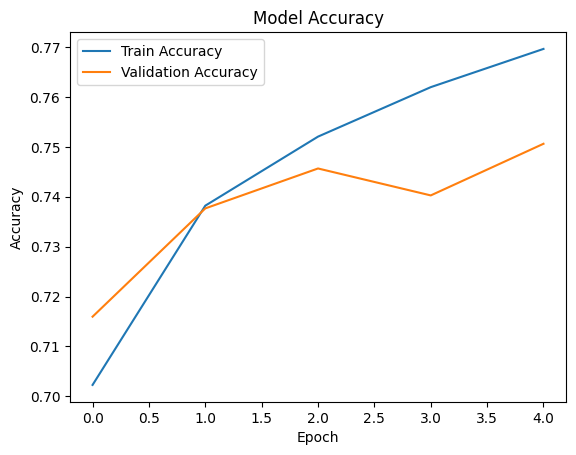

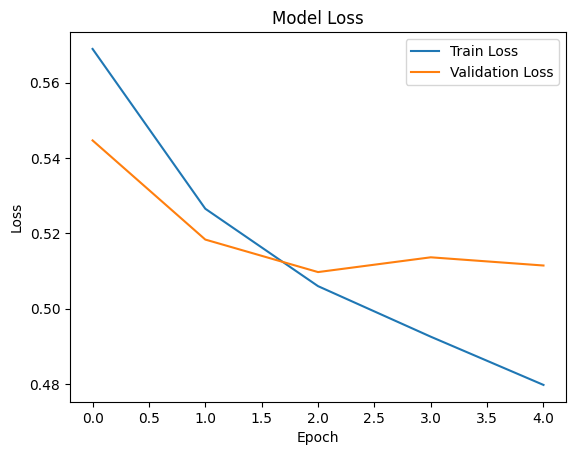

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




MODEL LOSS PLOT

Train Loss: This curve shows the loss on the training set over the epochs. The steady decrease indicates that the model is learning from the training data and improving its performance.

Validation Loss: This curve shows the loss on the validation set. Initially, it decreases, which suggests that the model is generalizing well. However, after about the third epoch, it begins to flatten, potentially indicating that further training might not yield significant improvements or may lead to overfitting if extended.

Observations:

Both curves show good convergence, with the validation loss tracking close to the training loss.
There is no significant divergence between the two, which suggests the model isn't overfitting within these epochs.

The final loss is low for both training and validation, which is a positive sign for the model's predictive performance.


Model ACCURACY PLOT 

Train Accuracy: This curve represents the accuracy on the training data. The steady increase reflects the model's ability to fit the training set better over epochs.

Validation Accuracy: This curve represents the accuracy on the validation data. It increases initially but shows some fluctuations after the second epoch.

Observations:

The validation accuracy slightly lags behind the training accuracy, which is normal, but the gap is small, indicating good generalization.

The fluctuations in validation accuracy after epoch 2 could indicate the model has reached its optimal learning point. More training might not improve validation performance and could lead to overfitting.
